In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder

In [3]:
plt.style.use("ggplot")

In [4]:
df_1 = pd.read_csv("/content/drive/MyDrive/Master/M4 - Supervised Learning/CSV_JFK_FLIGHT_DELAY/JFK_flights_data1.csv", index_col = 0)

In [5]:
df_2 = pd.read_csv("/content/drive/MyDrive/Master/M4 - Supervised Learning/CSV_JFK_FLIGHT_DELAY/JFK_flights_data2.csv", index_col = 0)

In [6]:
df_3 = pd.concat([df_1, df_2], axis = 0, ignore_index = True)

# Visualización de datos

In [7]:
df_3.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'TAXI_OUT', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')

In [8]:
df_3.head(3).T

,0,1,2
FL_DATE,2018-02-01,2018-02-01,2018-02-01
OP_CARRIER_AIRLINE_ID,20363.0,20363.0,20363.0
TAIL_NUM,N299PQ,N920XJ,N605LR
ORIGIN,BNA,RDU,BUF
ORIGIN_CITY_NAME,"Nashville, TN","Raleigh/Durham, NC","Buffalo, NY"
ORIGIN_STATE_NM,Tennessee,North Carolina,New York
DEST,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York
CRS_DEP_TIME,1359,1354,1529


In [9]:
TARGET = "ARR_DEL15"

# Data Understanding

## Estadísticos descriptivos

In [10]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,237644.0,20152.000736,297.881929,19690.0,19790.0,20363.0,20409.0,21171.0
CRS_DEP_TIME,250152.0,1334.611164,529.100385,3.0,915.0,1258.0,1744.0,2359.0
TAXI_OUT,232641.0,18.189820,9.609596,1.0,12.0,16.0,21.0,166.0
CRS_ARR_TIME,250152.0,1419.131404,580.986009,1.0,944.0,1455.0,1914.0,2400.0
ARR_DEL15,250152.0,0.210400,0.407594,0.0,0.0,0.0,0.0,1.0
CRS_ELAPSED_TIME,250152.0,195.647706,97.374339,47.0,109.0,167.0,306.0,595.0
DISTANCE,250152.0,1258.844866,898.116163,94.0,427.0,1028.0,2248.0,4983.0


In [11]:
df_3.describe(include=["object"]).T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


# Número de Nulos

In [12]:
df_3.select_dtypes(include=["object"]).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
dtype: int64

In [13]:
df_3.select_dtypes(exclude=["object"]).isnull().sum()

OP_CARRIER_AIRLINE_ID    12508
CRS_DEP_TIME                 0
TAXI_OUT                 17511
CRS_ARR_TIME                 0
ARR_DEL15                    0
CRS_ELAPSED_TIME             0
DISTANCE                     0
dtype: int64

# Distribución del TARGET

In [14]:
df_3[TARGET].mean()

0.21040007675333397

# Exploración de variables

## Fechas

In [15]:
LAX_df = df_3[df_3["ORIGIN"] == "LAX"]

In [16]:
LAX_df.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
34,2018-02-01,19805.0,N104NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1530,40.0,2359,1.0,329.0,2475.0


In [17]:
LAX_df_dia = LAX_df[["FL_DATE", TARGET]].groupby("FL_DATE").mean()

In [18]:
LAX_df_dia.head(15)

,ARR_DEL15
FL_DATE,
2018-01-01,0.322581
2018-01-02,0.371429
2018-01-03,0.107143
2018-01-04,0.500000
2018-01-05,0.724138
2018-01-06,0.636364
2018-01-07,0.694444
2018-01-08,0.485714
2018-01-09,0.135135


In [19]:
LAX_df_dia.index

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='FL_DATE', length=730)

In [20]:
LAX_df_dia.index = pd.to_datetime(LAX_df_dia.index)

<Axes: xlabel='FL_DATE'>

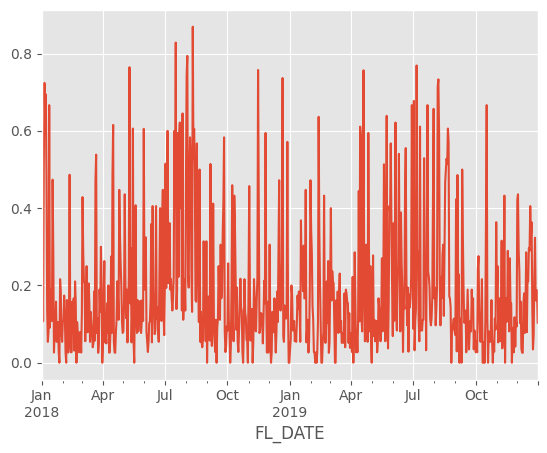

In [21]:
LAX_df_dia[TARGET].plot()

In [22]:
media_retrasos_semana = LAX_df_dia[TARGET].resample("M").mean()

<Axes: xlabel='FL_DATE'>

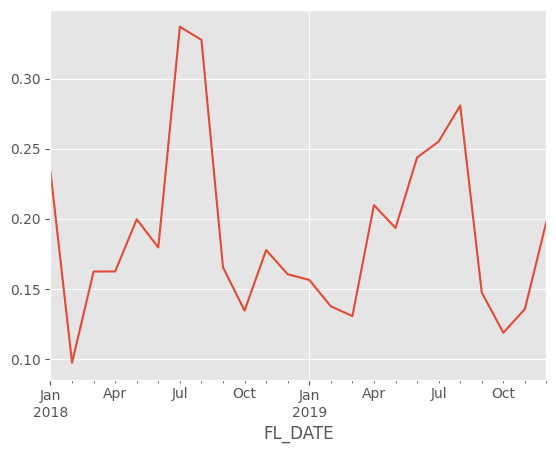

In [23]:
media_retrasos_semana.plot()

In [ ]:
#Conclusiones:

#Verano y navidad hay mas retrasos
#Febrero es un mes con pocos retrasos

In [ ]:
#Data preparation:

#Extraer mes, año, día, trimestre, semana

# Análisis de variables numéricas

<Axes: ylabel='Frequency'>

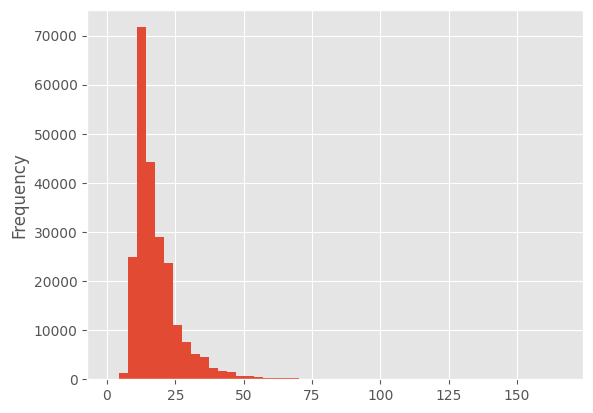

In [24]:
#Data Preparation
df_3["TAXI_OUT"].plot(kind="hist", bins = 50)

In [ ]:
#Como se relaciona la variable target. ¿Es informativa?

<Axes: xlabel='ARR_DEL15', ylabel='TAXI_OUT'>

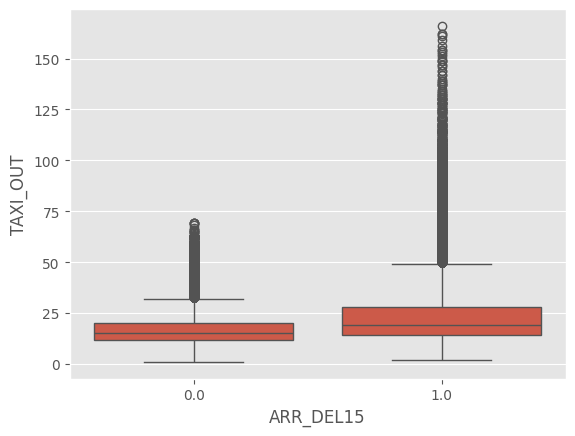

In [25]:
sns.boxplot(data = df_3, x = TARGET, y = "TAXI_OUT")

<Axes: ylabel='Density'>

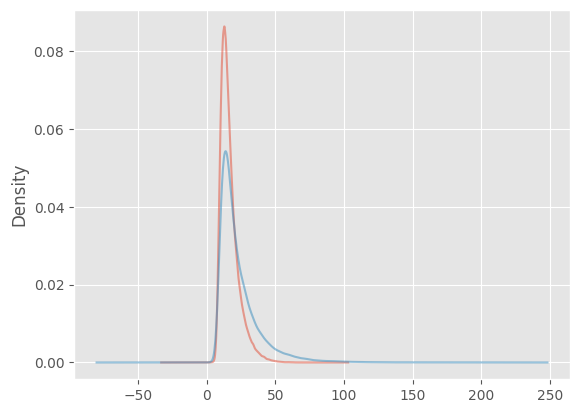

In [26]:
df_3[df_3[TARGET] == 0]["TAXI_OUT"].plot(kind="density", alpha=.5)
df_3[df_3[TARGET] == 1]["TAXI_OUT"].plot(kind="density", alpha=.5)

In [ ]:
#Conclusiones:
#En "TAXI_OUT" bajo, normalmente no hay retrasos en el vuelo.
#En "TAXI_OUT" alto, normalmente si los hay.

In [ ]:
#Transofrmaciones: Nulos
#Vamos a utilizar de base un algoritrmo s¡mbolista. Por lo tano, metemos como valor extremo -1

# Variables Categóricas

In [27]:
df_3.pivot_table(index="ORIGIN", values=TARGET, aggfunc=["count", "sum", "mean"]).sort_values(by=[("mean", "ARR_DEL15")], ascending=False).head(10)

,count,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN,,,
IAH,192,71.0,0.369792
ORD,5647,1705.0,0.301930
HNL,754,222.0,0.294430
HOU,648,189.0,0.291667
ACK,919,263.0,0.286181
EGE,161,46.0,0.285714
HYA,171,47.0,0.274854
PHL,851,233.0,0.273796


In [ ]:
#Conclusión:
#El aeropuerto IAH es el que mas se retrasa por una media del 37% que contrasta con el 21% de media.
#Es más importane ell aeropuerto de ORD porque tiene una media de retrasos del 30% y afecta a muchos mas vuelos.

In [28]:
df_3.pivot_table(index="ORIGIN", values=TARGET, aggfunc=["count", "sum", "mean"]).sort_values(by=[("mean", "ARR_DEL15")], ascending=False).tail(10)

,count,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
ORIGIN,,,
ROC,4181,740.0,0.176991
LAS,7377,1258.0,0.170530
MSP,2806,471.0,0.167855
ORH,577,96.0,0.166378
PDX,2528,405.0,0.160206
BGR,442,67.0,0.151584
SMF,684,101.0,0.147661
STT,478,65.0,0.135983


# Data Preparation

## Limpieza de atributos

### Transformación de tipos

#### Numéricas que son categóricas

In [29]:
df_3["AEROLINEA"] = df_3["OP_CARRIER_AIRLINE_ID"].astype(object)

In [30]:
df_3.select_dtypes(include=["object"]).describe().T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152
AEROLINEA,237644.0,11.0,20409.0,78587.0


In [31]:
df_3.drop("OP_CARRIER_AIRLINE_ID", axis=1, inplace=True)

### Imputación de Nulos

#### Categóricas

In [32]:
df_3.select_dtypes(include=["object"]).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
AEROLINEA           12508
dtype: int64

In [33]:
# TAIL_NUM

In [34]:
df_3["TAIL_NUM"].value_counts(dropna=False)

NaN       15009
N110AN      761
N113AN      751
N111ZM      748
N115NN      740
          ...  
N197UW        1
N986AN        1
N315RJ        1
N801AW        1
N945DN        1
Name: TAIL_NUM, Length: 2646, dtype: int64

In [35]:
valor_nulo = "NULO"

In [36]:
df_3["TAIL_NUM"].fillna(value=valor_nulo, inplace=True)

In [37]:
df_3["AEROLINEA"].fillna(value=valor_nulo, inplace=True)

#### Numérica

In [38]:
df_3.select_dtypes(exclude=["object"]).isnull().sum()

CRS_DEP_TIME            0
TAXI_OUT            17511
CRS_ARR_TIME            0
ARR_DEL15               0
CRS_ELAPSED_TIME        0
DISTANCE                0
dtype: int64

In [39]:
df_3["TAXI_OUT"].fillna(value= -1, inplace=True)

# Eliminar variables con poca varianza

In [40]:
non_variance_features = ["DEST", "DEST_CITY_NAME", "DEST_STATE_NM"]

In [41]:
df_3.drop(non_variance_features, axis=1, inplace=True)

## Variables Fechas

In [42]:
df_3["FL_DATE"] = pd.to_datetime(df_3["FL_DATE"])

In [43]:
df_3["FL_DATE"].dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
250147    2018
250148    2018
250149    2018
250150    2018
250151    2018
Name: FL_DATE, Length: 250152, dtype: int64

In [44]:
df_3["Year"] = df_3["FL_DATE"].dt.year
df_3["Season"] = df_3["FL_DATE"].dt.quarter
df_3["Month"] = df_3["FL_DATE"].dt.month
df_3["Day"] = df_3["FL_DATE"].dt.day
df_3["Week"] = df_3["FL_DATE"].dt.isocalendar().week
df_3["Weekday"] = df_3["FL_DATE"].dt.weekday

In [45]:
df_3["Weekday"].value_counts() #Los días 5 y 6 son los findes siendo el 0 los lunes.

0    37183
4    36848
3    36679
6    36288
1    35945
2    35443
5    31766
Name: Weekday, dtype: int64

In [46]:
df_3.pivot_table(index="Weekday", values=TARGET, aggfunc=["count", "sum", "mean"]).sort_values(by=[("mean", "ARR_DEL15")], ascending=False).head(10)

,count,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
Weekday,,,
4,36848,8729.0,0.236892
3,36679,8512.0,0.232067
0,37183,7811.0,0.210069
2,35443,7358.0,0.207601
6,36288,7326.0,0.201885
1,35945,7255.0,0.201836
5,31766,5641.0,0.177580


In [47]:
df_3.drop("FL_DATE", axis=1, inplace=True)

## Tratamiendo de Categóricas

In [48]:
df_3.select_dtypes(include="object").describe().T

,count,unique,top,freq
TAIL_NUM,250152,2646,NULO,15009
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
AEROLINEA,250152.0,12.0,20409.0,78587.0


In [49]:
#TAIL_NUM: FREQUENCY ENCODING / OHE después de agrupar en otros minoritarios
#ORIGIN: OHE
#ORIGIN_CITY_NAME: OHE
#ORIGIN_STATE_NM: OHE
#AEROLINEA: OHE
#UTILIZARÉ OHE EN TODAS AQUELLAS VARIABLES QUE TENGAN MENOS DE 100 ETIQUETAS DE PRIMERA OPCIÓN.

# TAIL_NUM: FE

In [52]:
df_3.pivot_table(index="TAIL_NUM", values=TARGET, aggfunc=[len, "sum", "mean"]).sort_values(by=[("len", "ARR_DEL15")], ascending=False).head(10)

,len,sum,mean
,ARR_DEL15,ARR_DEL15,ARR_DEL15
TAIL_NUM,,,
NULO,15009,3109.0,0.207142
N110AN,761,164.0,0.215506
N113AN,751,134.0,0.178429
N111ZM,748,162.0,0.216578
N109NN,740,118.0,0.159459
N115NN,740,121.0,0.163514
N112AN,737,151.0,0.204885
N116AN,723,147.0,0.203320


In [53]:
df_tail_num = pd.DataFrame(df_3["TAIL_NUM"].value_counts())

In [54]:
df_tail_num.columns = ["TAIL_NUM_COUNT"]

In [55]:
df_tail_num ["TAIL_NUM"]= df_tail_num.index

In [56]:
df_tail_num

,TAIL_NUM_COUNT,TAIL_NUM
NULO,15009,NULO
N110AN,761,N110AN
N113AN,751,N113AN
N111ZM,748,N111ZM
N115NN,740,N115NN
...,...,...
N197UW,1,N197UW
N986AN,1,N986AN
N315RJ,1,N315RJ
N801AW,1,N801AW


In [57]:
df_3 = df_3.merge(df_tail_num, on = "TAIL_NUM")

In [58]:
df_3.drop("TAIL_NUM", axis= 1, inplace = True)

# OHE

In [59]:
dummy_dataset= pd.get_dummies(df_3["ORIGIN"], prefix ="ORIGIN")

In [60]:
df_3 = pd.concat([df_3, dummy_dataset], axis = 1)

In [61]:
df_3.drop("ORIGIN", axis = 1, inplace = True)

In [62]:
dummy_dataset= pd.get_dummies(df_3["ORIGIN_CITY_NAME"], prefix ="ORIGIN_CITY_NAME")

In [63]:
df_3 = pd.concat([df_3, dummy_dataset], axis = 1)

In [64]:
df_3.drop("ORIGIN_CITY_NAME", axis = 1, inplace = True)

In [65]:
dummy_dataset= pd.get_dummies(df_3["ORIGIN_STATE_NM"], prefix ="ORIGIN_STATE_NM")

In [66]:
df_3 = pd.concat([df_3, dummy_dataset], axis = 1)

In [67]:
df_3.drop("ORIGIN_STATE_NM", axis = 1, inplace = True)

In [68]:
dummy_dataset= pd.get_dummies(df_3["AEROLINEA"], prefix ="AEROLINEA")

In [69]:
df_3 = pd.concat([df_3, dummy_dataset], axis = 1)

In [70]:
df_3.drop("AEROLINEA", axis = 1, inplace = True)

# Modeling

In [71]:
from sklearn import model_selection #traing/test split
from sklearn import metrics #evaluación

## Partición entre development y validación

In [72]:
df_3.pivot_table(index=["Year", "Month"], values = TARGET, aggfunc=[len, sum, "mean"])

len       sum      mean
           ARR_DEL15 ARR_DEL15 ARR_DEL15
Year Month                              
2018 1          9244    1968.0  0.212895
     2          9115    1418.0  0.155568
     3          9927    1825.0  0.183842
     4         10393    2184.0  0.210141
     5         10915    2478.0  0.227027
     6         11052    2504.0  0.226565
     7         11201    3463.0  0.309169
     8         11202    3345.0  0.298607
     9         10591    2304.0  0.217543
     10        10952    1628.0  0.148649
     11        10194    2138.0  0.209731
     12        10697    2199.0  0.205572
2019 1         10245    2154.0  0.210249
     2          9381    1817.0  0.193689
     3         11084    1812.0  0.163479
     4         10308    2236.0  0.216919
     5         10797    2122.0  0.196536
     6         10543    2743.0  0.260173
     7         10661    2735.0  0.256543
     8         10782    2912.0  0.270080
     9         10120    1544.0  0.152569
     10        10426    1418.0  0.136006
     11         9937    1205.0  0.121264
     12        10385    2480.0  0.238806

In [73]:
# Ideas:
# Los mas recientes pasan a validación: desde Julio para tener mayor rango de datos

In [75]:
dev_df = df_3[(df_3["Year"] == 2018) | (df_3["Month"] <7 )]
val_df = df_3[(df_3["Year"] == 2019) & (df_3["Month"] >=7 )]

In [77]:
dev_df.shape

(187841, 199)

In [78]:
dev_df_X = dev_df.drop(TARGET, axis= 1)
dev_df_y = dev_df[[TARGET]]

In [79]:
val_df_X = val_df.drop(TARGET, axis= 1)
val_df_y = val_df[[TARGET]]

## Train Test Split

In [81]:
model_selection.train_test_split??

In [80]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dev_df_X, dev_df_y, test_size=0.2, random_state=42)

In [82]:
dev_df.shape[0]*0.2

37568.200000000004

#### Modelizar

In [83]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [84]:
# Instanciar el modelo
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

In [85]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [86]:
dot_data = export_graphviz(
    decision_tree = dt,
    out_file = None,
    # max_depth = None,
    feature_names=X_test.columns,
    class_names=["No delay", "Delay"],
    # label = "all",
    filled = True,
    # leaves_parallel = False,
    impurity = True,
    # node_ids = False,
    proportion = True,
    rotate = True,
    rounded = True,
    # special_characters = False,
    precision = 4,
)

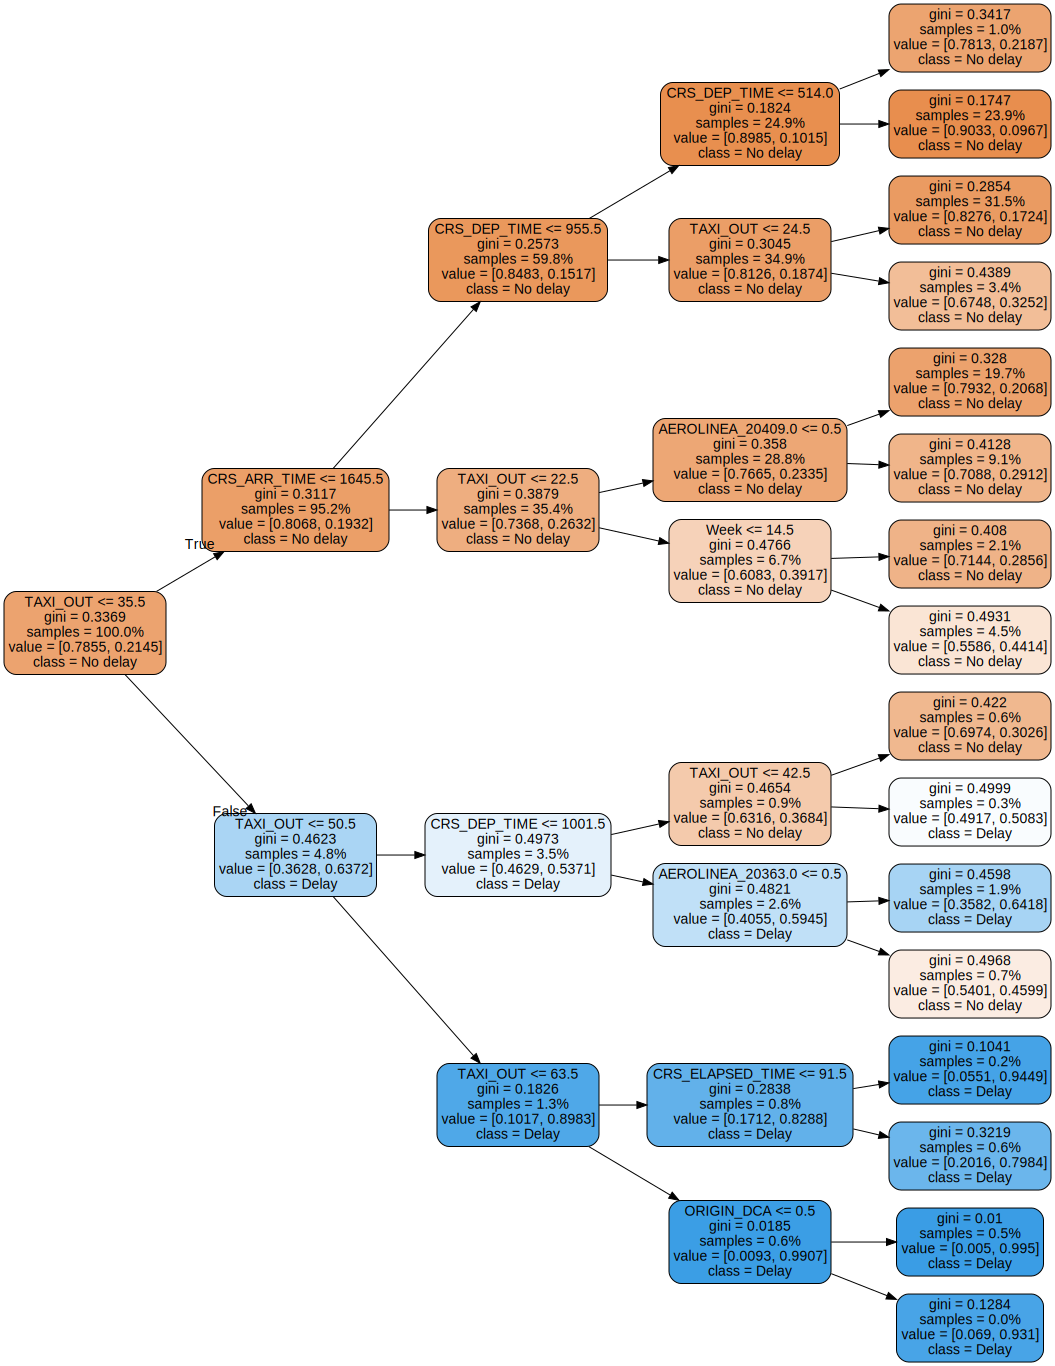

In [87]:
graphviz.Source(dot_data, format="png")

## Model Evaluation

### Opción 1

In [90]:
y_test_pred = pd.DataFrame(dt.predict(X_test), index = y_test.index, columns = ["DelayPrediction"])

In [91]:
y_test_pred.shape

(37569, 1)

In [92]:
y_test.shape

(37569, 1)

In [93]:
y_test.head()

,ARR_DEL15
91964,1.0
205250,1.0
156190,0.0
117192,0.0
33706,0.0


In [95]:
result_df = y_test.join(y_test_pred, how="inner")

In [96]:
result_df.head(5)

,ARR_DEL15,DelayPrediction
91964,1.0,1.0
205250,1.0,0.0
156190,0.0,0.0
117192,0.0,0.0
33706,0.0,0.0


In [97]:
result_df["Success"] = (result_df[TARGET] == result_df["DelayPrediction"]).astype(int)

In [98]:
result_df.head(5)

,ARR_DEL15,DelayPrediction,Success
91964,1.0,1.0,1
205250,1.0,0.0,0
156190,0.0,0.0,1
117192,0.0,0.0,1
33706,0.0,0.0,1


In [100]:
result_df["Success"].count() # Total de filas en test

37569

In [101]:
result_df["Success"].sum() # Cuantas veces he acertado

30065

In [102]:
result_df["Success"].mean() # Accuracy

0.8002608533631451

In [ ]:
# Tengop que comparar el accuracy con la media del TARGET

In [103]:
result_df["ARR_DEL15"].mean()

0.2158960845377838

In [104]:
# Significa que un modelo que predice siempre 0, tiene un accuracy del 0,785
# Comparo esta fórmula de abajo con la mean de Success para ver cuanto ha mejorado este con respecto al TARGET
1 - result_df["ARR_DEL15"].mean()

0.7841039154622162

#### Confusion Matrix

In [106]:
confusion_matrix = pd.crosstab(result_df["ARR_DEL15"], result_df["DelayPrediction"])

In [107]:
confusion_matrix

DelayPrediction,0.0,1.0
ARR_DEL15,,
0.0,29091,367
1.0,7137,974


In [ ]:
# Diferencia entre FP y FN: Muchos mas FN >>> FP
# Real 8k retrasos. En predicción hay 1,3k

In [108]:
TP = 974
TN = 29091
FP = 367
FN = 7137

In [109]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [110]:
FN

7137

In [111]:
acc = (TP + TN)/(TP + TN + FP + FN)

In [112]:
acc

0.8002608533631451

In [113]:
dt.score(X_test, y_test) #Esto es para sacar el Accuracy de forma rápida para casos más rápidos.

0.8002608533631451

In [115]:
dt.predict_proba(X_test)[:,1]

array([0.79844961, 0.09667354, 0.20676933, ..., 0.20676933, 0.20676933,
       0.21868653])

In [119]:
y_score = pd.DataFrame(dt.predict_proba(X_test)[:,1], index = y_test.index, columns = ["DelayScore"])

In [120]:
result_df.join(y_score)

,ARR_DEL15,DelayPrediction,Success,DelayScore
91964,1.0,1.0,1,0.798450
205250,1.0,0.0,0,0.096674
156190,0.0,0.0,1,0.206769
117192,0.0,0.0,1,0.172407
33706,0.0,0.0,1,0.206769
...,...,...,...,...
115374,0.0,0.0,1,0.441397
238952,0.0,0.0,1,0.291228
33965,0.0,0.0,1,0.206769
86339,1.0,0.0,0,0.206769


#### Overfitting

In [123]:
for i in range(1,20):
  dt = DecisionTreeClassifier(max_depth = i, random_state = 42)
  dt.fit(X_train, y_train)
  acc_train = dt.score(X_train, y_train)
  acc_test = dt.score(X_test, y_test)
  print("Profundidad del árbol: {}. Train: {}, Test: {}, Diferencia:{} ". format(i, np.round(acc_train,3), np.round(acc_test,3), np.round(acc_train,3) - np.round(acc_test,3) ))

Profundidad del árbol: 1. Train: 0.799, Test: 0.797, Diferencia:0.0020000000000000018 
Profundidad del árbol: 2. Train: 0.799, Test: 0.797, Diferencia:0.0020000000000000018 
Profundidad del árbol: 3. Train: 0.801, Test: 0.8, Diferencia:0.0010000000000000009 
Profundidad del árbol: 4. Train: 0.802, Test: 0.8, Diferencia:0.0020000000000000018 
Profundidad del árbol: 5. Train: 0.802, Test: 0.801, Diferencia:0.0010000000000000009 
Profundidad del árbol: 6. Train: 0.803, Test: 0.801, Diferencia:0.0020000000000000018 
Profundidad del árbol: 7. Train: 0.806, Test: 0.803, Diferencia:0.0030000000000000027 
Profundidad del árbol: 8. Train: 0.809, Test: 0.803, Diferencia:0.006000000000000005 
Profundidad del árbol: 9. Train: 0.812, Test: 0.803, Diferencia:0.009000000000000008 
Profundidad del árbol: 10. Train: 0.817, Test: 0.805, Diferencia:0.0119999999999999 
Profundidad del árbol: 11. Train: 0.822, Test: 0.803, Diferencia:0.018999999999999906 
Profundidad del árbol: 12. Train: 0.83, Test: 0.802

In [ ]:
# Accuracy Train: Siempre crece. A mayor profundidad puede hacer reglas mas específicas.
# Accuracy Test: Primero crece a un ritmo mas lento que el Train y, en cierto punto, decrece.
# Cual es la profundidad óptima?:
# Opción 1: Profunidad 6-7 poca diferencia y buen accuracy
# Opción 2: Profunidad 8-9 un poco mas de diferencia entre Train y Test (controlada) y mejor accuracy

In [125]:
for i in range(1,20):
  dt = DecisionTreeClassifier(max_depth = i, random_state = 42, min_samples_split = 100) # min_sample_split es el número mínimo de preguntas a hacer.
  dt.fit(X_train, y_train)
  acc_train = dt.score(X_train, y_train)
  acc_test = dt.score(X_test, y_test)
  print("Profundidad del árbol: {}. Train: {}, Test: {}, Diferencia:{} ". format(i, np.round(acc_train,3), np.round(acc_test,3), np.round(acc_train,3) - np.round(acc_test,3) ))

Profundidad del árbol: 1. Train: 0.799, Test: 0.797, Diferencia:0.0020000000000000018 
Profundidad del árbol: 2. Train: 0.799, Test: 0.797, Diferencia:0.0020000000000000018 
Profundidad del árbol: 3. Train: 0.801, Test: 0.8, Diferencia:0.0010000000000000009 
Profundidad del árbol: 4. Train: 0.802, Test: 0.8, Diferencia:0.0020000000000000018 
Profundidad del árbol: 5. Train: 0.802, Test: 0.801, Diferencia:0.0010000000000000009 
Profundidad del árbol: 6. Train: 0.803, Test: 0.801, Diferencia:0.0020000000000000018 
Profundidad del árbol: 7. Train: 0.806, Test: 0.803, Diferencia:0.0030000000000000027 
Profundidad del árbol: 8. Train: 0.808, Test: 0.804, Diferencia:0.0040000000000000036 
Profundidad del árbol: 9. Train: 0.81, Test: 0.803, Diferencia:0.007000000000000006 
Profundidad del árbol: 10. Train: 0.813, Test: 0.805, Diferencia:0.007999999999999896 
Profundidad del árbol: 11. Train: 0.816, Test: 0.804, Diferencia:0.0119999999999999 
Profundidad del árbol: 12. Train: 0.819, Test: 0.80

In [126]:
dt_final = DecisionTreeClassifier(max_depth = 9, random_state = 42, min_samples_split = 100) # min_sample_split es el número mínimo de preguntas a hacer.
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=100, random_state=42)

### Otras métricas de evaluación

In [130]:
y_test_pred = pd.DataFrame(dt_final.predict(X_test), index = y_test.index, columns = ["DelayPrediction"])

In [131]:
y_test_pred.shape

(37569, 1)

In [132]:
y_test.shape

(37569, 1)

In [133]:
y_test.head()

,ARR_DEL15
91964,1.0
205250,1.0
156190,0.0
117192,0.0
33706,0.0


In [143]:
result_df = y_test.join(y_test_pred, how="inner")

In [144]:
result_df.head(5)

,ARR_DEL15,DelayPrediction
91964,1.0,1.0
205250,1.0,0.0
156190,0.0,0.0
117192,0.0,0.0
33706,0.0,0.0


In [145]:
result_df["Success"] = (result_df[TARGET] == result_df["DelayPrediction"]).astype(int)

In [146]:
result_df.head(5)

,ARR_DEL15,DelayPrediction,Success
91964,1.0,1.0,1
205250,1.0,0.0,0
156190,0.0,0.0,1
117192,0.0,0.0,1
33706,0.0,0.0,1


In [147]:
result_df["Success"].count() # Total de filas en test

37569

In [148]:
result_df["Success"].sum() # Cuantas veces he acertado

30181

In [149]:
result_df["Success"].mean() # Accuracy

0.8033485054166999

In [150]:
# Tengo que comparar el accuracy con la media del TARGET

In [151]:
result_df["ARR_DEL15"].mean()

0.2158960845377838

In [152]:
# Significa que un modelo que predice siempre 0, tiene un accuracy del 0,785
# Comparo esta fórmula de abajo con la mean de Success para ver cuanto ha mejorado este con respecto al TARGET
1 - result_df["ARR_DEL15"].mean()

0.7841039154622162

#### Confusion Matrix

In [153]:
confusion_matrix = pd.crosstab(result_df["ARR_DEL15"], result_df["DelayPrediction"])

In [154]:
TP = confusion_matrix.iloc[1,1]
TN = confusion_matrix.iloc[0,0]
FP = confusion_matrix.iloc[0,1]
FN = confusion_matrix.iloc[1,0]

In [155]:
Precision = TP / (TP + FP)
Recall = TP / (TP+FN)

In [156]:
f1_score = 2 / (1/ Precision + 1/ Recall)

In [161]:
Precision

0.6499377851513894

In [162]:
Recall

0.1931944273209222

In [158]:
f1_score

0.2978521193689413

In [160]:
metrics.f1_score(y_test, y_test_pred) #Con este comando no hace falta que me monte la Confusión Matrix

0.2978521193689413

In [ ]:
# El F1.Score, puede legar a tener un valor máximo de 1 por lo que un valor de 0.29 nos da a entender que la métrica es muy baja y hay que ver porque
# La Precision no es mala ya que tiene un valor de 0.65 y suele acertar con el retraso de los vuelos.
# La Recall es muy baja (un valor de 0.19 cuando su máximo es 1)

### CURVA ROC Y AUC

In [163]:
y_score = pd.DataFrame(dt_final.predict_proba(X_test)[:,1], index = y_test.index, columns = ["DelayScore"])

In [164]:
result_df = result_df.join(y_score)

In [165]:
result_df.head()

,ARR_DEL15,DelayPrediction,Success,DelayScore
91964,1.0,1.0,1,0.835052
205250,1.0,0.0,0,0.085192
156190,0.0,0.0,1,0.133675
117192,0.0,0.0,1,0.123762
33706,0.0,0.0,1,0.171743


In [166]:
metrics.roc_auc_score(result_df["ARR_DEL15"], result_df["DelayScore"]) # Hay que pasar el predict_proba, NO el predict

0.7181547449968138

In [167]:
fpr,tpr,th = metrics.roc_curve(result_df["ARR_DEL15"], result_df["DelayScore"])

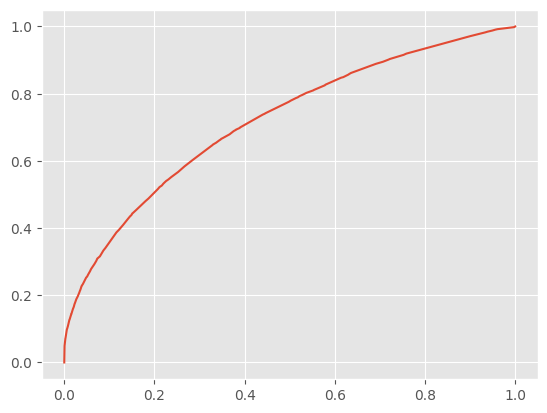

In [175]:
plt.plot(fpr,tpr)

### Accuracy en validación

In [176]:
dt_final.score(val_df_X, val_df_y)

AttributeError: 'numpy.float64' object has no attribute 'score'

In [177]:
dt_final.score(X_test, y_test)

AttributeError: 'numpy.float64' object has no attribute 'score'

## Descargar el modelo

In [179]:
import pickle
from google.colab import files

In [180]:
filename = "final_model.pkl"

In [181]:
pickle.dump(dt_final, open(filename, "wb"))

In [182]:
files.download("final_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>